<a href="https://colab.research.google.com/github/Sreenavya-04/PROJECTS/blob/main/Minor_project_(AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/employe.csv')
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [ ]:
# Shape
df.shape[0]

14999

In [ ]:
df.shape[1]

10

In [ ]:
df.shape

(14999, 10)

In [ ]:
df=df.drop_duplicates()
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


1. What is the current workforce size, and how many employees have already left the organization?

In [ ]:
totalemployee=len(df)
totalemployee

11991

In [ ]:
totalemployee=df.count()
totalemployee

,0
satisfactoryLevel,11991
lastEvaluation,11991
numberOfProjects,11991
avgMonthlyHours,11991
timeSpent.company,11991
workAccident,11991
left,11991
promotionInLast5years,11991
dept,11991
salary,11991


In [ ]:
attrition_count=df['left'].value_counts()
attrition_count

,count
left,
0,10000
1,1991


In [ ]:
attrition_rate=attrition_count[1]/totalemployee*100
attrition_rate

,0
satisfactoryLevel,16.60412
lastEvaluation,16.60412
numberOfProjects,16.60412
avgMonthlyHours,16.60412
timeSpent.company,16.60412
workAccident,16.60412
left,16.60412
promotionInLast5years,16.60412
dept,16.60412
salary,16.60412


Which departments are experiencing the highest rates of attrition?

In [ ]:
highest_attrition_dept=df.groupby('dept')['left'].mean().sort_values(ascending=False)
highest_attrition_dept

,left
dept,
hr,0.188020
accounting,0.175523
technical,0.173797
support,0.171334
sales,0.169805
marketing,0.166419
IT,0.161885
product_mng,0.160350
RandD,0.122478


In [ ]:
high_attrition_dept=highest_attrition_dept.head(1)
high_attrition_dept

,left
dept,
hr,0.18802


3. Are employees working on fewer than 3 projects more likely to leave the company?

In [ ]:
employees_who_left = df[df['left'] == 1]
attrition_lessthan3_project_df = employees_who_left[employees_who_left['numberOfProjects'] < 3]
attrition_lessthan3_project = len(attrition_lessthan3_project_df) / len(employees_who_left) * 100
print(f"Attrition rate for employees who left with less than 3 projects: {attrition_lessthan3_project:.2f}%")

Attrition rate for employees who left with less than 3 projects: 43.04%


4. How does the number of projects correlate with time spent at the company,
particularly for those who have left?

In [ ]:
numerical_df=df.select_dtypes(include=np.number)
correlations=numerical_df.corr()['left'].sort_values(ascending=False)
print("Correlation with 'left' column:")
print(correlations)

Correlation with 'left' column:
left                     1.000000
timeSpent.company        0.173295
avgMonthlyHours          0.070409
numberOfProjects         0.030928
lastEvaluation           0.013520
promotionInLast5years   -0.044657
workAccident            -0.125436
satisfactoryLevel       -0.350558
Name: left, dtype: float64


5. Could compensation levels be influencing an employee’s decision to leave?

Salary (or) Compensation

In [ ]:
salary_df=df.groupby('salary')['left'].mean().sort_values(ascending=False)
salary_df

,left
salary,
low,0.204530
medium,0.146170
high,0.048485


In [ ]:
attrition_salary=salary_df.head(1)
attrition_salary

,left
salary,
low,0.20453


In [ ]:
atrrition_salary=salary_df.tail(1)
atrrition_salary

,left
salary,
high,0.048485


In [ ]:
salary_counts = df.groupby('left')['salary'].value_counts(normalize=True).unstack()
print("Proportion of employees in each salary level by attrition status:")
print(salary_counts)

Proportion of employees in each salary level by attrition status:
salary      high       low    medium
left                                
0       0.094200  0.456600  0.449200
1       0.024108  0.589653  0.386238


● Analyze employee attrition patterns using statistical summaries and visualizations.

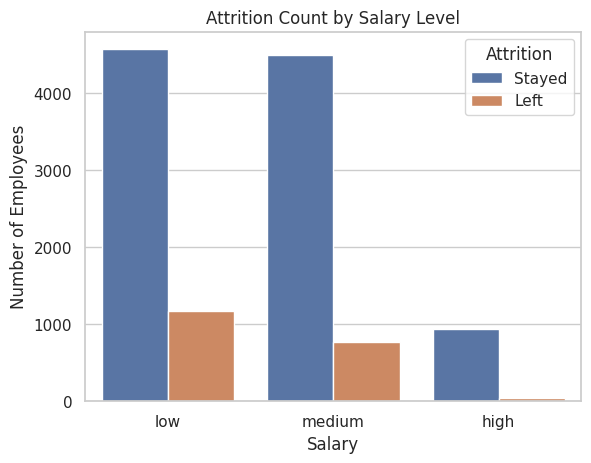

In [ ]:
sns.countplot(x='salary', hue='left', data=df, order=['low', 'medium', 'high'])
plt.title('Attrition Count by Salary Level')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

Identify key factors that are associated with employees leaving the company, such as:

1. Departmental distribution
2.   Number of projects
3.   Time spent at the company
4.   Salary levels
5.   Promotion history







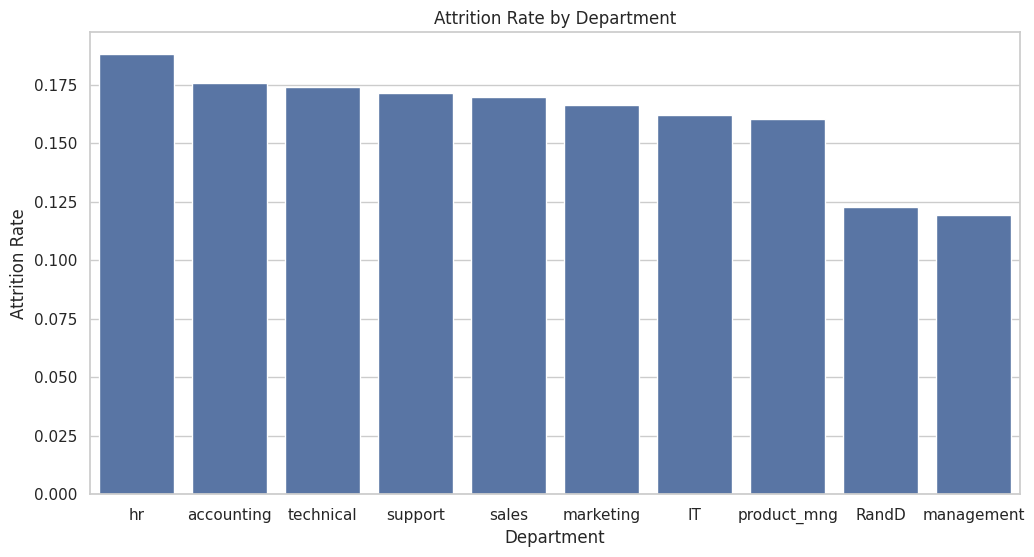

In [ ]:
plt.figure(figsize=(12, 6))
dept_attrition=df.groupby('dept')['left'].mean().sort_values(ascending=False)
sns.barplot(x=dept_attrition.index, y=dept_attrition.values)
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate')
plt.xlabel('Department')
plt.show()

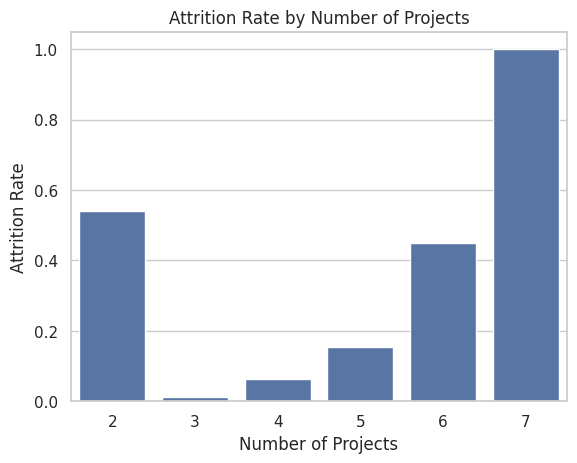

In [ ]:
project_attrition = df.groupby('numberOfProjects')['left'].mean()
sns.barplot(x=project_attrition.index, y=project_attrition.values)
plt.title('Attrition Rate by Number of Projects')
plt.ylabel('Attrition Rate')
plt.xlabel('Number of Projects')
plt.show()

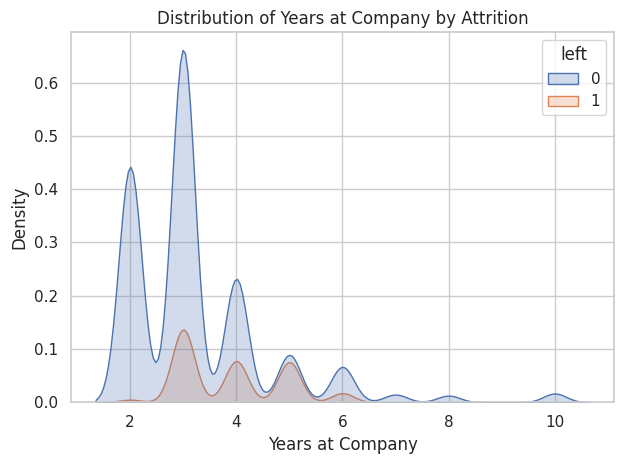

In [ ]:
sns.kdeplot(data=df, x="timeSpent.company", hue="left", fill=True)
plt.title("Distribution of Years at Company by Attrition")
plt.xlabel("Years at Company")
plt.ylabel("Density")
plt.tight_layout()

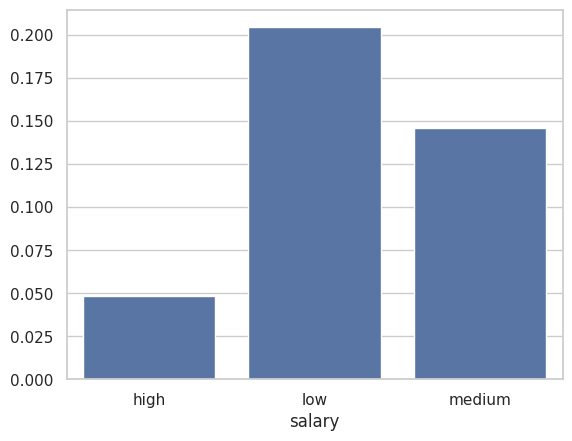

In [ ]:
salary_attrition = df.groupby('salary')['left'].mean()
sns.barplot(x=salary_attrition.index, y=salary_attrition.values)
plt.show()


Promotion-based Attrition Rates:
 promotionInLast5years
0    16.822192
1     3.940887
Name: left, dtype: float64


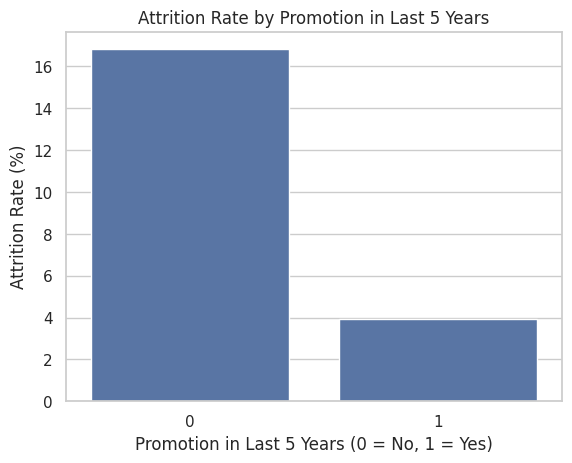

In [ ]:
promotion_attrition = df.groupby('promotionInLast5years')['left'].mean() * 100
print("\nPromotion-based Attrition Rates:\n", promotion_attrition)
sns.barplot(x=promotion_attrition.index.astype(str), y=promotion_attrition.values)
plt.title("Attrition Rate by Promotion in Last 5 Years")
plt.xlabel("Promotion in Last 5 Years (0 = No, 1 = Yes)")
plt.ylabel("Attrition Rate (%)")
plt.show()


Attrition by Number of Projects:
 numberOfProjects
2     54.171934
3      1.079545
4      6.431479
5     15.360502
6     44.915254
7    100.000000
Name: left, dtype: float64


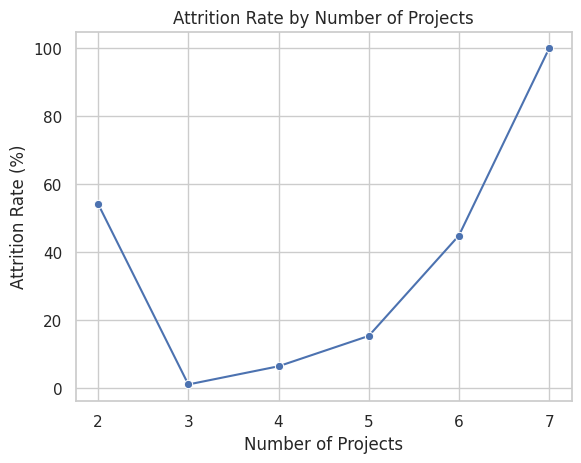

In [ ]:
project_attrition = df.groupby('numberOfProjects')['left'].mean() * 100
print("\nAttrition by Number of Projects:\n", project_attrition)
sns.lineplot(x=project_attrition.index, y=project_attrition.values, marker='o')
plt.title("Attrition Rate by Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Attrition Rate (%)")
plt.grid(True)
plt.show()